In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

[Star Wars Survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) (2014)

In [119]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars_moovie = star_wars.iloc[0,:]
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [120]:
star_wars_moovie = star_wars_moovie[star_wars_moovie != 'Response'][1:].reset_index()
star_wars_moovie = dict(zip(star_wars_moovie.iloc[:,0],star_wars_moovie.iloc[:,1]))
star_wars_moovie

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'Star Wars: Episode I  The Phantom Menace',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
 'Unnamed: 10': 'Star Wars: Episode II  Attack of the Clones',
 'Unnamed: 11': 'Star Wars: Episode III  Revenge of the Sith',
 'Unnamed: 12': 'Star Wars: Episode IV  A New Hope',
 'Unnamed: 13': 'Star Wars: Episode V The Empire Strikes Back',
 'Unnamed: 14': 'Star Wars: Episode VI Return of the Jedi',
 'Unnamed: 16': 'Luke Skywalker',
 'Unnamed: 17': 'Princess Leia Organa',
 'Unnamed: 18': 'Anakin Skywalker',
 'Unnamed: 19': 'Obi Wan Kenobi',
 'Unnamed: 20': 'Emperor Palpatine',
 'Unnamed: 21': 'Darth Vader',
 'Unnamed: 22': 'Lando Calrissian',
 'Unnamed: 23': 'Boba Fett',
 'Unnamed: 24': 'C-3P0',
 'Unnamed: 25': 'R2 D2',
 'Unnamed: 26': 'Jar Jar Binks',
 'Unnamed: 27': 'Pad

In [121]:
star_wars.shape

(1186, 38)

Good results of survey in article: [America’s Favorite ‘Star Wars’](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/)

In [122]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [123]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

In [124]:
star_wars = star_wars.rename(columns={
   "Which of the following Star Wars films have you seen? Please select all that apply.": "see Episode I",
   "Unnamed: 4": "see Episode II",
   "Unnamed: 5": "see Episode III",
   "Unnamed: 6": "see Episode IV",
   "Unnamed: 7": "see Episode V",
   "Unnamed: 8": "see Episode VI"
        })

In [125]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "rank Episode I",
        "Unnamed: 10": "rank Episode II",
        "Unnamed: 11": "rank Episode III",
        "Unnamed: 12": "rank Episode IV",
        "Unnamed: 13": "rank Episode V",
        "Unnamed: 14": "rank Episode VI"
        })

In [141]:
star_wars = star_wars.rename(columns = star_wars_moovie) # rename names of heroes

In [128]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [129]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,see Episode I,see Episode II,see Episode III,see Episode IV,see Episode V,see Episode VI,rank Episode I,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [130]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

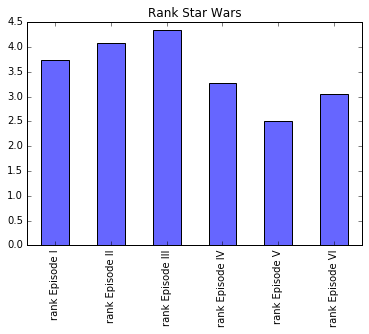

In [139]:
star_wars[star_wars.columns[9:15]].mean().plot(kind = 'bar',
                                               title = 'Rank Star Wars',
                                               color = '#6666ff')

I knew it!

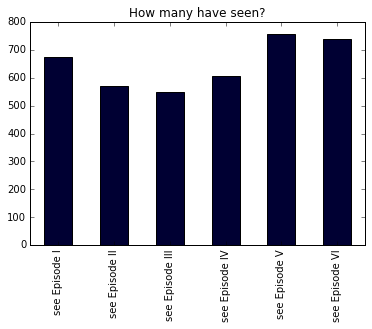

In [140]:
star_wars[star_wars.columns[3:9]].sum().plot(kind = 'bar',
                                             title = 'How many have seen?',
                                             color = '#000033')

In [143]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

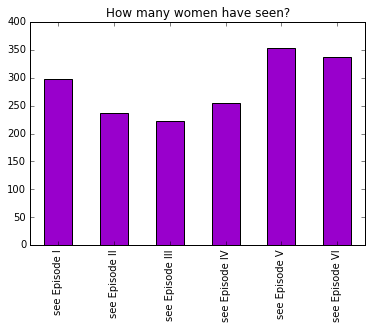

In [146]:
females[females.columns[3:9]].sum().plot(kind = 'bar',
                                             title = 'How many women have seen?',
                                             color = '#9900cc')

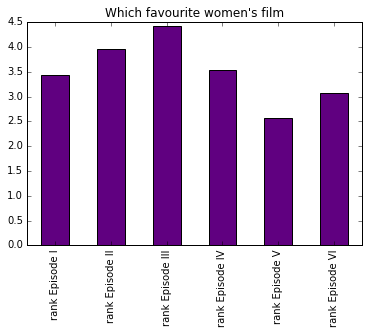

In [147]:
females[females.columns[9:15]].mean().plot(kind = 'bar',
                                               title = 'Which favourite women\'s film',
                                               color = '#600080')

Ha, the same!

* Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
* Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    * Which character do respondents like the most?
    * Which character do respondents dislike the most?
    * Which character is the most controversial (split between likes and dislikes)?